<a href="https://colab.research.google.com/github/kiwili5820/ds_lop/blob/master/sample_01_national_pension_hj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 포스트 코로나 시대의 경제 상황을 국민연금 가입자 오픈데이터를 통해 알아보자?!!

- 데이터셋: 공공 데이터 포털
- 형태: 파일데이터 (csv)
- 다운로드: https://www.data.go.kr/data/3046071/fileData.do

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['figure.figsize'] = (10, 7)

pd.set_option('display.float_format', lambda x: '%.2f' % x)

%matplotlib inline

In [ ]:
df = pd.read_csv('data/national-pension-202006.csv')

In [ ]:
df.head()

자료생성년월(자격마감일(사유발생일이 속하는 달의 다음달 15일)까지 신고분 반영)       사업장명   사업자등록번호  \
0                                      202005.00  (주)니프코코리아 211814.00   
1                                      202005.00  글로웨이 주식회사 110812.00   
2                                      202005.00    신일기업(주) 201810.00   
3                                      202005.00   디에스디엘(주) 104811.00   
4                                      202005.00     (주)헤럴드 104810.00   

    사업장가입상태코드 1:등록2:탈퇴     우편번호        사업장지번상세주소           사업장도로명상세주소  \
0                 1.00 31409.00     충청남도 아산시 둔포면  충청남도 아산시 둔포면 아산밸리남로   
1                 1.00  6072.00    서울특별시 강남구 청담동   서울특별시 강남구 영동대로137길   
2                 1.00  4537.00   서울특별시 중구 충무로2가         서울특별시 중구 퇴계로   
3                 1.00  4526.00  서울특별시 중구 남대문로4가        서울특별시 중구 세종대로   
4                 1.00  4336.00    서울특별시 용산구 후암동      서울특별시 용산구 후암로4길   

      고객법정동주소코드   고객행정동주소코드   법정동주소광역시도코드  ...   사업장형태구분코드 1:법인2:개인   사업장업종코드  \
0 4420036032.00  4420036032         44.00  ...                 1.00    252901   
1 1168010400.00  1168056500         11.00  ...                 1.00    452101   
2 1114012500.00  1114055000         11.00  ...                 1.00    381002   
3 1114011700.00  1114054000         11.00  ...                 1.00    701201   
4 1117010100.00  1117051000         11.00  ...                 1.00    221200   

               사업장업종코드명        적용일자    재등록일자     탈퇴일자   가입자수(고지인원 수 포함)  \
0     포장용 플라스틱 성형용기 제조업 19880101.00 10101.00 10101.00            625.00   
1       미장  타일 및 방수 공사업 19880101.00 10101.00 10101.00              3.00   
2                   NaN 19880101.00 10101.00 10101.00             18.00   
3  비주거용 건물 임대업(점포  자기땅) 19880101.00 10101.00 10101.00             19.00   
4       잡지 및 정기 간행물 발행업 19880101.00 10101.00 10101.00            305.00   

    당월고지금액(※ 국민연금법 시행령 제5조에 의거 기준소득월액 상한액 적용으로 실제소득과 고지금액은 상이할 수 있음 : 상한액 2019.7.~2020.6. 4860000원(2019.7.1.기준) 상한액 2020.7.~2021.6. 5030000원(2020.7.1.기준))  \
0                                       263793840.00                                                                                                         
1                                         1099960.00                                                                                                         
2                                         5954520.00                                                                                                         
3                                         4064440.00                                                                                                         
4                                       108148760.00                                                                                                         

    신규취득자수(납부재개 포함 : ※ 전달 고지대상자와 비교하므로 실제 취득자와 상이할 수 있음(초일취득 고지 초일이 아닌경우. 미고지(다음달 취득자수에 반영))  \
0                                               0.00                                           
1                                               0.00                                           
2                                               0.00                                           
3                                               0.00                                           
4                                               4.00                                           

    상실가입자수(납부예외 포함 : ※ 전달 고지대상자와 비교하므로 실제 퇴사자와 상이할 수 있음(초일이 아닌 상실자는 다음달 상실자수에 반영) 국민연금법 제6조 8조 동법 시행령 제18조에 의거 60세 도달하거나 퇴직연금수급자 조기노령연금 수급권을 취득한 자는 가입대상에서 제외되며 18세미만 기초수급자는 본인희망에 의해 제외될 수 있음)  
0                                               3.00                                                                                                                                             
1                                               0.00                                                                                                                                             
2                                               0.00                           

## Column 정리 (Clean)

In [ ]:
df.columns

Index(['자료생성년월(자격마감일(사유발생일이 속하는 달의 다음달 15일)까지 신고분 반영)', ' 사업장명', ' 사업자등록번호',
       ' 사업장가입상태코드 1:등록2:탈퇴', ' 우편번호', ' 사업장지번상세주소', ' 사업장도로명상세주소',
       ' 고객법정동주소코드', ' 고객행정동주소코드', ' 법정동주소광역시도코드', ' 법정동주소광역시시군구코드',
       ' 법정동주소광역시시군구읍면동코드', ' 사업장형태구분코드 1:법인2:개인', ' 사업장업종코드', ' 사업장업종코드명',
       ' 적용일자', ' 재등록일자', ' 탈퇴일자', ' 가입자수(고지인원 수 포함)',
       ' 당월고지금액(※ 국민연금법 시행령 제5조에 의거 기준소득월액 상한액 적용으로 실제소득과 고지금액은 상이할 수 있음 : 상한액 2019.7.~2020.6. 4860000원(2019.7.1.기준) 상한액 2020.7.~2021.6. 5030000원(2020.7.1.기준))',
       ' 신규취득자수(납부재개 포함 : ※ 전달 고지대상자와 비교하므로 실제 취득자와 상이할 수 있음(초일취득 고지 초일이 아닌경우. 미고지(다음달 취득자수에 반영))',
       ' 상실가입자수(납부예외 포함 : ※ 전달 고지대상자와 비교하므로 실제 퇴사자와 상이할 수 있음(초일이 아닌 상실자는 다음달 상실자수에 반영) 국민연금법 제6조 8조 동법 시행령 제18조에 의거 60세 도달하거나 퇴직연금수급자 조기노령연금 수급권을 취득한 자는 가입대상에서 제외되며 18세미만 기초수급자는 본인희망에 의해 제외될 수 있음)'],
      dtype='object')

In [ ]:
columns = ['자료생성년월', '사업장명', '사업자번호', '가입상태', '우편번호', '지번주소', '도로명주소', '법정주소코드', 
           '행정주소코드', '광역시코드', '시군구코드', '읍면동코드', '사업장형태', '업종코드', '업종코드명', 
           '적용일', '재등록일', '탈퇴일', '가입자수', '고지금액', '신규', '상실',
          ]

In [ ]:
len(df.columns)

22

In [ ]:
len(columns)

22

In [ ]:
df.columns = columns

In [ ]:
df.head()

자료생성년월       사업장명     사업자번호  가입상태     우편번호             지번주소  \
0 202005.00  (주)니프코코리아 211814.00  1.00 31409.00     충청남도 아산시 둔포면   
1 202005.00  글로웨이 주식회사 110812.00  1.00  6072.00    서울특별시 강남구 청담동   
2 202005.00    신일기업(주) 201810.00  1.00  4537.00   서울특별시 중구 충무로2가   
3 202005.00   디에스디엘(주) 104811.00  1.00  4526.00  서울특별시 중구 남대문로4가   
4 202005.00     (주)헤럴드 104810.00  1.00  4336.00    서울특별시 용산구 후암동   

                 도로명주소        법정주소코드      행정주소코드  광역시코드  ...  사업장형태    업종코드  \
0  충청남도 아산시 둔포면 아산밸리남로 4420036032.00  4420036032  44.00  ...   1.00  252901   
1   서울특별시 강남구 영동대로137길 1168010400.00  1168056500  11.00  ...   1.00  452101   
2         서울특별시 중구 퇴계로 1114012500.00  1114055000  11.00  ...   1.00  381002   
3        서울특별시 중구 세종대로 1114011700.00  1114054000  11.00  ...   1.00  701201   
4      서울특별시 용산구 후암로4길 1117010100.00  1117051000  11.00  ...   1.00  221200   

                  업종코드명         적용일     재등록일      탈퇴일   가입자수         고지금액  \
0     포장용 플라스틱 성형용기 제조업 19880101.00 10101.00 10101.00 625.00 263793840.00   
1       미장  타일 및 방수 공사업 19880101.00 10101.00 10101.00   3.00   1099960.00   
2                   NaN 19880101.00 10101.00 10101.00  18.00   5954520.00   
3  비주거용 건물 임대업(점포  자기땅) 19880101.00 10101.00 10101.00  19.00   4064440.00   
4       잡지 및 정기 간행물 발행업 19880101.00 10101.00 10101.00 305.00 108148760.00   

    신규   상실  
0 0.00 3.00  
1 0.00 0.00  
2 0.00 0.00  
3 0.00 2.00  
4 4.00 2.00  

[5 rows x 22 columns]

## 핵심 데이터 column 추출

In [ ]:
df_main = df[['사업장명', '가입자수', '신규', '상실', '고지금액']]

In [ ]:
df_main.head()

사업장명   가입자수   신규   상실         고지금액
0  (주)니프코코리아 625.00 0.00 3.00 263793840.00
1  글로웨이 주식회사   3.00 0.00 0.00   1099960.00
2    신일기업(주)  18.00 0.00 0.00   5954520.00
3   디에스디엘(주)  19.00 0.00 2.00   4064440.00
4     (주)헤럴드 305.00 4.00 2.00 108148760.00

## 데이터 통계

In [ ]:
df_main['신규'].mean()

0.7133490952613984

In [ ]:
df_main['상실'].mean()

0.6194477036128619

In [ ]:
df_main['가입자수'].mean()

19.763622177543773

In [ ]:
df_main['고지금액'].mean()

5482982.487200803

## 월급, 연봉 추정

In [ ]:
(df_main['고지금액'] / df_main['가입자수']).head()

0   422070.14
1   366653.33
2   330806.67
3   213917.89
4   354586.10
dtype: float64

In [ ]:
df_main['인당고지금액'] = df_main['고지금액'] / df_main['가입자수']
df['인당고지금액'] = df['고지금액'] / df['가입자수']

In [ ]:
df_main['인당고지금액'].head()

0   422070.14
1   366653.33
2   330806.67
3   213917.89
4   354586.10
Name: 인당고지금액, dtype: float64

**국민연금 정보로 어떻게 연봉정보를 계산하나요?**


국민연금 보험률은 9%입니다. 쉽게 이야기 하면 급여(신고소득월액)의 9%를 국민연금으로 내는 것입니다. 

하지만 이를 절반으로 나누어 **4.5%는 회사가, 나머지 절반은 개인이 부담하는 구조**입니다. 회사는 급여 외에 추가로 금액을 부담합니다.

국민연금 보험료는 **소득 상한선과 하한선이 설정되어 있어 소득 전체가 아닌 일부 소득에만 부과**됩니다.

이를 역산하면 신고소득월액의 계산이 가능합니다. 하지만 **상한선과 하한선이 설정되어 있어 실제보다 과소계산**될 수 있습니다

[수식]

- 임직원 평균 월급 = 인당고지금액 / 9% * 100%
- 임직원 평균 연봉 = 임직원 평균 월급 * 12개월

In [ ]:
df_main['평균월급'] = df_main['인당고지금액'] / 9 * 100
df['평균월급'] = df['인당고지금액'] / 9 * 100

In [ ]:
df_main['평균연봉'] = df_main['평균월급'] * 12
df['평균연봉'] = df['평균월급'] * 12

In [ ]:
df_main['평균월급'].notnull().sum()

486786

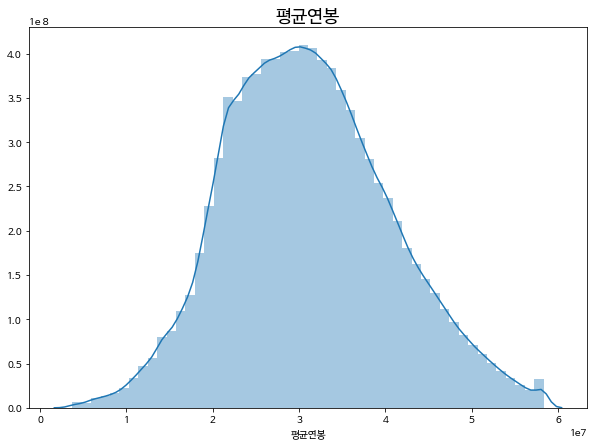

In [ ]:
plt.figure(figsize=(10, 7))
sns.distplot(df_main.loc[df_main['평균연봉'].notnull(), '평균연봉'])
plt.title('평균연봉', fontsize=18)
plt.show()

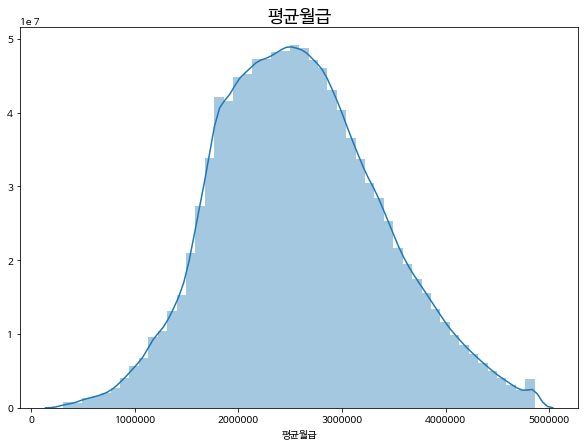

In [ ]:
plt.figure(figsize=(10, 7))
sns.distplot(df_main.loc[df_main['평균월급'].notnull(), '평균월급'])
plt.title('평균월급', fontsize=18)
plt.show()

## 정렬(Order)

### 연봉 King!

In [ ]:
df_main.sort_values(by='가입자수', ascending=False).head(20)

사업장명      가입자수     신규     상실           고지금액    인당고지금액  \
3621          삼성전자(주) 103237.00 427.00 496.00 44035185740.00 426544.61   
2647         현대자동차(주)  67738.00 133.00 352.00 28575086920.00 421847.22   
11133         엘지전자(주)  40100.00 116.00 202.00 16446605260.00 410139.78   
117297  에스케이하이닉스 주식회사  27859.00 157.00 162.00 11583565820.00 415792.59   
154297         (주)이마트  27390.00 300.00 308.00  6383200960.00 233048.59   
130001     엘지디스플레이(주)  26785.00  59.00 115.00 11317077400.00 422515.49   
167214     삼성디스플레이(주)  23301.00  78.00 125.00  9980636760.00 428335.13   
382474       주식회사 케이티  22659.00  32.00  87.00  9682304700.00 427305.03   
2783           한국전력공사  22536.00  95.00  67.00  8903739980.00 395089.63   
4893          홈플러스(주)  21626.00 139.00 262.00  4644195820.00 214750.57   
8520          (주)엘지화학  20506.00  16.00  44.00  8500776520.00 414550.69   
2710          대한항공(주)  18176.00 613.00 119.00  7413092120.00 407850.58   
423104         (주)포스코  17351.00  14.00  61.00  7358611060.00 424102.99   
382884         한국철도공사  17205.00  48.00  57.00  5875923540.00 341524.18   
382436        국민은행(주)  16849.00  39.00  71.00  6915773240.00 410456.01   
166114       농협은행주식회사  16748.00 140.00 173.00  6453310020.00 385318.25   
471924         서울교통공사  16450.00  68.00  82.00  6539954360.00 397565.61   
3943     스타벅스커피코리아(주)  15789.00 212.00 304.00  2502689740.00 158508.44   
3104         국민건강보험공단  15241.00  79.00 131.00  5460419500.00 358271.73   
2639          (주)우리은행  14241.00  43.00  60.00  5763278900.00 404696.22   

             평균월급        평균연봉  
3621   4739384.54 56872614.46  
2647   4687191.32 56246295.87  
11133  4557108.69 54685304.27  
117297 4619917.69 55439012.26  
154297 2589428.81 31073145.72  
130001 4694616.56 56335398.67  
167214 4759279.17 57111350.07  
382474 4747833.68 56974004.15  
2783   4389884.82 52678617.80  
4893   2386117.44 28633409.29  
8520   4606118.82 55273425.79  
2710   4531673.10 54380077.17  
423104 4712255.50 56547065.95  
382884 3794713.13 45536557.51  
382436 4560622.29 54727467.43  
166114 4281313.87 51375766.42  
471924 4417395.72 53008748.61  
3943   1761204.88 21134458.50  
3104   3980797.05 47769564.55  
2639   4496624.69 53959496.29

### 신규 채용 King!

In [ ]:
df_main.sort_values(by='신규', ascending=False).head(20)

사업장명     가입자수      신규  \
313193                                  쿠팡풀필먼트서비스 유한회사 12164.00 4063.00   
257899                                  쿠팡풀필먼트서비스 유한회사 13791.00 2375.00   
381255                                        대덕전자주식회사  2351.00 2351.00   
191857                                         쿠팡 주식회사 12273.00 1514.00   
381598                     주식회사　세보엠이씨(일용)일반설비 1공구(3-1)  1429.00 1429.00   
393529                                   한국맥도날드유한회사(A)  8279.00 1359.00   
65522                                           (주)제니엘  6187.00  927.00   
379285            주식회사　세보엠이씨(일용)P2-하층서편 상층동편 기계배관공사(A)   728.00  728.00   
372037                                      인천공항경비주식회사   698.00  695.00   
481602            (주)세방테크-(일용)평택 FAB2기 신축공사 일반배관공사 3공구  1680.00  667.00   
441003                                   주식회사비케이알(버거킹)  3855.00  631.00   
382986                                       주식회사 유베이스 10159.00  620.00   
2710                                           대한항공(주) 18176.00  613.00   
46752                                 (유)아웃백스테이크하우스코리아  3165.00  582.00   
133634                                     (주)동서기공시화지점   569.00  569.00   
125680                                            진주시청  1121.00  554.00   
65776                                       SK브로드밴드(주)  2377.00  550.00   
379675                                 성남시청(성남형연대안전기금)   495.00  495.00   
75185                                       재단법인경기복지재단   575.00  490.00   
376271  대명지이씨（주）-(일용)평택 FAB2기 신축공사(하층서편)중 일반전기공사 3-2공구   479.00  479.00   

            상실          고지금액    인당고지금액       평균월급        평균연봉  
313193 4602.00  602010580.00  49491.17  549901.88  6598822.54  
257899 1079.00 2561355180.00 185726.57 2063628.60 24763543.18  
381255   35.00  935602200.00 397959.25 4421769.46 53061233.52  
191857  691.00 3411985700.00 278007.47 3088971.91 37067662.89  
381598    1.00  412810980.00 288881.02 3209789.13 38517469.56  
393529 1024.00  755471660.00  91251.56 1013906.22 12166874.58  
65522   517.00 1060803180.00 171456.79 1905075.48 22860905.77  
379285    2.00  209708900.00 288061.68 3200685.29 38408223.44  
372037    5.00  182957120.00 262116.22 2912402.42 34948829.04  
481602    3.00  535126560.00 318527.71 3539196.83 42470361.90  
441003  477.00  375317820.00  97358.71 1081763.42 12981161.09  
382986  770.00 1728395500.00 170134.41 1890382.36 22684588.38  
2710    119.00 7413092120.00 407850.58 4531673.10 54380077.17  
46752   194.00  478193620.00 151088.03 1678755.91 20145070.88  
133634    6.00  202310260.00 355554.06 3950600.66 47407207.97  
125680   67.00  175375900.00 156445.94 1738288.23 20859458.82  
65776    10.00  991576500.00 417154.61 4635051.18 55620614.22  
379675    8.00   90607140.00 183044.73 2033830.30 24405963.64  
75185   489.00  114041260.00 198332.63 2203695.85 26444350.14  
376271    0.00  121556600.00 253771.61 2819684.53 33836214.34

### 상실 King!

In [ ]:
df_main.sort_values(by='상실', ascending=False).head(20)

사업장명      가입자수      신규      상실           고지금액    인당고지금액  \
313193   쿠팡풀필먼트서비스 유한회사  12164.00 4063.00 4602.00   602010580.00  49491.17   
394683          (주)교원구몬   2158.00   21.00 2071.00   709906460.00 328965.00   
3453            하나투어(주)   2257.00    9.00 1841.00   638104980.00 282722.63   
483834       중앙경찰학교(신임)   1857.00    0.00 1500.00   220149180.00 118550.99   
257899   쿠팡풀필먼트서비스 유한회사  13791.00 2375.00 1079.00  2561355180.00 185726.57   
393529    한국맥도날드유한회사(A)   8279.00 1359.00 1024.00   755471660.00  91251.56   
494187   (주)이랜드이츠 압구정지점   4825.00  243.00  801.00   684444440.00 141853.77   
382986        주식회사 유베이스  10159.00  620.00  770.00  1728395500.00 170134.41   
351364  씨제이올리브영주식회사-비정규   3406.00  197.00  741.00   329764420.00  96818.68   
191857          쿠팡 주식회사  12273.00 1514.00  691.00  3411985700.00 278007.47   
65522            (주)제니엘   6187.00  927.00  517.00  1060803180.00 171456.79   
3621            삼성전자(주) 103237.00  427.00  496.00 44035185740.00 426544.61   
75185        재단법인경기복지재단    575.00  490.00  489.00   114041260.00 198332.63   
441003    주식회사비케이알(버거킹)   3855.00  631.00  477.00   375317820.00  97358.71   
46929         효성ITX (주)   7208.00  317.00  459.00  1325498120.00 183892.64   
47300        주식회사 아성다이소  10895.00  275.00  459.00  1862925000.00 170988.99   
9168      (주)트랜스코스모스코리아   7421.00  411.00  453.00  1276016220.00 171946.67   
29201        (주) 티맥스데이터    458.00    6.00  450.00   176723080.00 385858.25   
382999        (주)에스텍시스템   8697.00  326.00  445.00  1956266280.00 224935.76   
299804   쿠팡로지스틱스서비스유한회사    460.00  151.00  434.00    28613620.00  62203.52   

             평균월급        평균연봉  
313193  549901.88  6598822.54  
394683 3655166.62 43861999.38  
3453   3141362.58 37696350.91  
483834 1317233.17 15806798.06  
257899 2063628.60 24763543.18  
393529 1013906.22 12166874.58  
494187 1576153.00 18913835.99  
382986 1890382.36 22684588.38  
351364 1075763.10 12909157.17  
191857 3088971.91 37067662.89  
65522  1905075.48 22860905.77  
3621   4739384.54 56872614.46  
75185  2203695.85 26444350.14  
441003 1081763.42 12981161.09  
46929  2043251.51 24519018.13  
47300  1899877.62 22798531.44  
9168   1910518.53 22926222.34  
29201  4287313.93 51447767.10  
382999 2499286.19 29991434.29  
299804  691150.24  8293802.90

## 300인 이하 기업

In [ ]:
people_limit = 300

In [ ]:
small = df_main.loc[(df_main['가입자수'].notnull()) & (df_main['가입자수'] < people_limit)]

In [ ]:
small['가입자수'].isnull().sum()

0

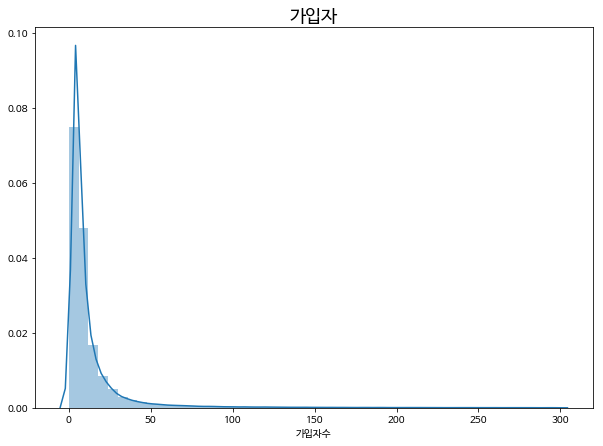

In [ ]:
plt.figure(figsize=(10, 7))
sns.distplot(small['가입자수'])
plt.title('가입자', fontsize=18)
plt.show()

In [ ]:
small.sort_values(by='상실', ascending=False)

사업장명   가입자수     신규     상실  \
46903                                     (주)레스모아 260.00   9.00 233.00   
121422                                  아이에스동서(주) 228.00   0.00 228.00   
385579                                 하나투어리스트(주) 228.00   0.00 217.00   
92558                                (재)광주경제고용진흥원 285.00  17.00 212.00   
507935                  은평구청(2020.코로나19 극복지원단 사업) 210.00 210.00 210.00   
360785                                     유한회사기성 190.00   1.00 190.00   
92586                                     화신산업(주) 185.00   0.00 184.00   
274427                               지에스아이(주)인천공항 182.00   0.00 182.00   
378584                  달서구청/직장 (코로나19 긴급생계자금 지원) 179.00 179.00 179.00   
387164                                국회사무처(회관인턴) 251.00  15.00 177.00   
381503              용인시청 시민안전담당관(경기도 재난기본소득 지급인력) 181.00 181.00 175.00   
377410                            동구청/경제지원과(긴급생계) 191.00 191.00 172.00   
137126                               달성군청 공공근로4단계 171.00 170.00 171.00   
270612              주식회사　두성시스템-T2 여객터미널(서) 환경미화용역 155.00   0.00 154.00   
154                                     아이에스동서(주) 202.00   1.00 143.00   
124796                             아이에스동서(주) 진주지점 139.00   0.00 139.00   
421079                                  주식회사 평안운수 273.00   0.00 138.00   
63664                                   (주)제이알더블유 262.00  44.00 133.00   
331793  한전케이피에스（주）한빛3사업처/일용/원전 기전설비 경상 및 계획예방정비공사 130.00   7.00 130.00   
26837                          대구광역시수성구청 일자리정책사업단 127.00 127.00 127.00   
46129                                   (주)세아네트웍스 166.00   0.00 126.00   
506549                                 경인지방통계청_일용 154.00 147.00 121.00   
494041                                주식회사서울랜드서비스 126.00  31.00 120.00   
241524                               대구시청/교육협력정책관 119.00 119.00 119.00   
47506                                     대덕모듈(주) 120.00   1.00 119.00   
442408                              (주)원피앤에스-인천공항 119.00   0.00 119.00   
487774           (주)화성건설이엔지-(일용)P2-PJT UT동 통합비계공사 109.00  16.00 109.00   
30939                                     (주)진명여객 152.00  11.00 108.00   
296952                                 (주)더이룸씨앤에스 113.00  12.00 106.00   
464092                                  주식회사비에이에스 218.00   1.00 103.00   
...                                           ...    ...    ...    ...   
194402                                     (주)예푸드   4.00   0.00   0.00   
194401                                  아이베란다주식회사  16.00   0.00   0.00   
194400                                  주식회사 매크로콤   4.00   0.00   0.00   
194431                                   (주)이앤에이텍   3.00   0.00   0.00   
194432                           서울시립청소년이동쉼터(동남권)   7.00   0.00   0.00   
194433                                     주식회사포엠   7.00   1.00   0.00   
194449                       한국주택관리(주)세종한신휴플러스아파트   7.00   0.00   0.00   
194462                                주식회사에이치케이공영   6.00   2.00   0.00   
194461                                  주식회사 야긴건영   3.00   0.00   0.00   
194458                                   (주)우리플렉스   7.00   0.00   0.00   
194457                                 （주）프로젝터119   3.00   0.00   0.00   
194456                             침산태왕아너스로뎀관리사무소   4.00   0.00   0.00   
194455                                주식회사토탈테크놀러지   3.00   0.00   0.00   
194454                                 화성우리지역아동센터   4.00   0.00   0.00   
194453                                  주식회사세명에스티   4.00   0.00   0.00   
194452                                  주식회사영광지엔티   3.00   0.00   0.00   
194450                                   (주)범우디앤씨   3.00   0.00   0.00   
194447                                     주식회사거원  12.00   0.00   0.00   
194434                                주식회사삼진상사타이어   8.00   1.00   0.00   
194446                                  한국콘텐츠공제조합   7.00   0.00   0.00   
194445                                    경보환경(주)   5.00   0.00   0.00   
194444                                 (사)서울경제인협회   3.00   1.00   0.00   
194442                                     주식회사맑음

## 사업장명 데이터 정제 (Cleansing)

In [ ]:
import re

# 괄호안 문자열 제거
pattern_1 = '\(.*\)'
pattern_2 = '\（.*\）'
pattern_3 = '주식회사'

### (주), (주식회사) 문자열 제거

In [ ]:
re.sub(pattern_1, '', '브레인크루(주)')

'브레인크루'

In [ ]:
re.sub(pattern_1, '', '브레인크루(주식회사)')

'브레인크루'

In [ ]:
re.sub(pattern_1, '', '(주)브레인크루')

'브레인크루'

In [ ]:
re.sub(pattern_2, '', '（주）타워홀딩스')

'타워홀딩스'

### 주식회사 문자열 제거

In [ ]:
re.sub(pattern_2, '', '브레인크루 주식회사')

'브레인크루 주식회사'

In [ ]:
re.sub(pattern_2, '', '브레인크루주식회사')

'브레인크루주식회사'

In [ ]:
re.sub(pattern_2, '', '주식회사브레인크루주식회사')

'주식회사브레인크루주식회사'

In [ ]:
def text_preprocess(text):
    text = re.sub(pattern_1, '', text)
    text = re.sub(pattern_2, '', text)
    text = re.sub(pattern_3, '', text)
    return text

In [ ]:
df_main['사업장명'] = df_main['사업장명'].apply(text_preprocess)

In [ ]:
df_main[df_main['사업장명'] == '패스트캠퍼스']

사업장명   가입자수   신규   상실        고지금액    인당고지금액       평균월급        평균연봉
268632  패스트캠퍼스 120.00 6.00 8.00 31263860.00 260532.17 2894801.85 34737622.22

In [ ]:
df['사업장명'] = df['사업장명'].apply(text_preprocess)

In [ ]:
df.columns

Index(['자료생성년월', '사업장명', '사업자번호', '가입상태', '우편번호', '지번주소', '도로명주소', '법정주소코드',
       '행정주소코드', '광역시코드', '시군구코드', '읍면동코드', '사업장형태', '업종코드', '업종코드명', '적용일',
       '재등록일', '탈퇴일', '가입자수', '고지금액', '신규', '상실', '인당고지금액', '평균월급', '평균연봉'],
      dtype='object')

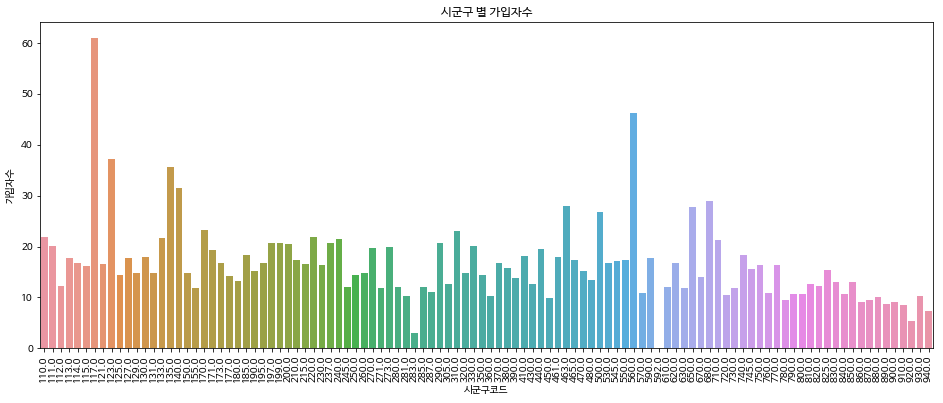

In [ ]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df.groupby('시군구코드')['가입자수'].mean().index, y=df.groupby('시군구코드')['가입자수'].mean())
plt.title('시군구 별 가입자수')
plt.xticks(rotation=90)
plt.show()

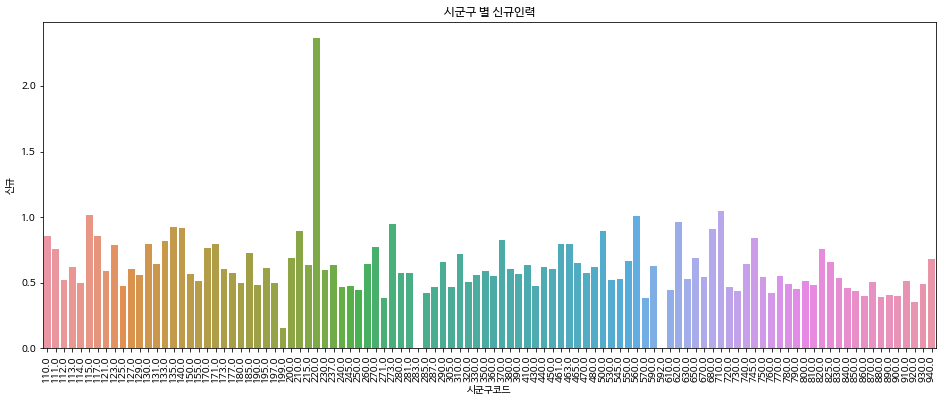

In [ ]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df.groupby('시군구코드')['신규'].mean().index, y=df.groupby('시군구코드')['신규'].mean())
plt.title('시군구 별 신규인력')
plt.xticks(rotation=90)
plt.show()

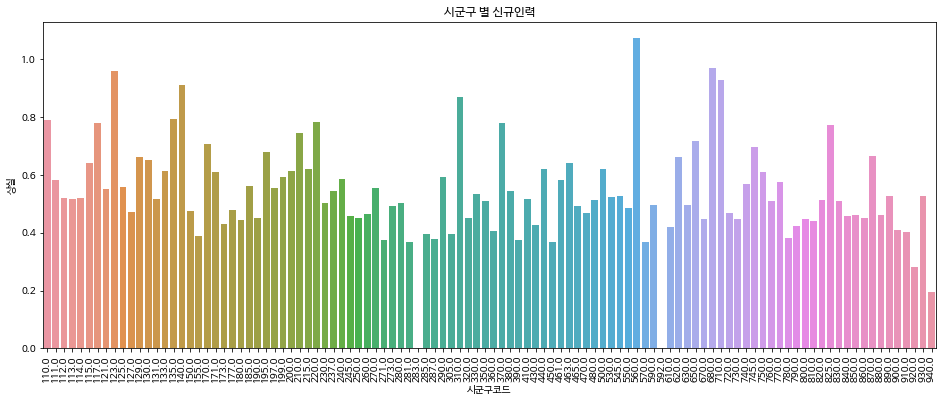

In [ ]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df.groupby('시군구코드')['상실'].mean().index, y=df.groupby('시군구코드')['상실'].mean())
plt.title('시군구 별 신규인력')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.head()

자료생성년월    사업장명     사업자번호  가입상태     우편번호             지번주소  \
0 202005.00  니프코코리아 211814.00  1.00 31409.00     충청남도 아산시 둔포면   
1 202005.00   글로웨이  110812.00  1.00  6072.00    서울특별시 강남구 청담동   
2 202005.00    신일기업 201810.00  1.00  4537.00   서울특별시 중구 충무로2가   
3 202005.00   디에스디엘 104811.00  1.00  4526.00  서울특별시 중구 남대문로4가   
4 202005.00     헤럴드 104810.00  1.00  4336.00    서울특별시 용산구 후암동   

                 도로명주소        법정주소코드      행정주소코드  광역시코드  ...         적용일  \
0  충청남도 아산시 둔포면 아산밸리남로 4420036032.00  4420036032  44.00  ... 19880101.00   
1   서울특별시 강남구 영동대로137길 1168010400.00  1168056500  11.00  ... 19880101.00   
2         서울특별시 중구 퇴계로 1114012500.00  1114055000  11.00  ... 19880101.00   
3        서울특별시 중구 세종대로 1114011700.00  1114054000  11.00  ... 19880101.00   
4      서울특별시 용산구 후암로4길 1117010100.00  1117051000  11.00  ... 19880101.00   

      재등록일      탈퇴일   가입자수         고지금액   신규   상실    인당고지금액       평균월급  \
0 10101.00 10101.00 625.00 263793840.00 0.00 3.00 422070.14 4689668.27   
1 10101.00 10101.00   3.00   1099960.00 0.00 0.00 366653.33 4073925.93   
2 10101.00 10101.00  18.00   5954520.00 0.00 0.00 330806.67 3675629.63   
3 10101.00 10101.00  19.00   4064440.00 0.00 2.00 213917.89 2376865.50   
4 10101.00 10101.00 305.00 108148760.00 4.00 2.00 354586.10 3939845.54   

         평균연봉  
0 56276019.20  
1 48887111.11  
2 44107555.56  
3 28522385.96  
4 47278146.45  

[5 rows x 25 columns]

## 신규 인력이 많은 시군구코드

**경기도 평택시**에서 최근 국민연금 가입자 신규인력이 가장 많이 발생했음

주로 건축 인력 혹은 건설사 인력들이 신규로 편입되면서 국민연금 가입자 발생이 가장 많이 일어난 것으로 집계 됐다.

In [ ]:
df.loc[df['시군구코드'] == 220][['사업장명','지번주소','신규']].sort_values(by='신규', ascending=False).head(20)

사업장명         지번주소      신규
381598                                       　세보엠이씨  경기도 평택시 고덕면 1429.00
379285                                       　세보엠이씨  경기도 평택시 고덕면  728.00
481602                     평택 FAB2기 신축공사 일반배관공사 3공구  경기도 평택시 고덕면  667.00
376271                         대명지이씨-중 일반전기공사 3-2공구  경기도 평택시 고덕면  479.00
374752                        두원이에프씨 중 일반전기공사 2-1공구  경기도 평택시 고덕면  388.00
376048                           세안이엔씨-일반전기공사 2-2공구  경기도 평택시 고덕면  383.00
508716                             신보- 일반전기공사 2-3공구  경기도 평택시 고덕면  377.00
508047                              중 일반전기공사 3-1 공구  경기도 평택시 장당동  370.00
319427              한양이엔지-평택 FAB 2기 신축공사 일반배관공사 7공구  경기도 평택시 고덕면  365.00
380824  대아이앤씨-평택FAB2기신축공사 중 하층서편  상층동편 공사 중 일반설비6공구  경기도 평택시 고덕면  325.00
372788                                       우현이앤지-  경기도 평택시 장당동  287.00
507319                       삼호이앤에프-평택 소방전기공사 2-1공구  경기도 평택시 고덕면  282.00
503876   존슨콘트롤즈인터내셔널코리아평택 전자 P2-PJT UT동 하층서편_소방설비공사  경기도 평택시 고덕면  245.00
320587             케이씨이앤씨-평택FAB 2기 신축공사 중 GAS 1공구공사  경기도 평택시 고덕면  189.00
373826                                               경기도 평택시 고덕면  187.00
376168                                               경기도 평택시 장당동  164.00
377575                                   에이치케이안전시스템  경기도 평택시 고덕면  153.00
361837                           평택 지제세교지구 1블록 공동주택  경기도 평택시 지제동  152.00
380130                                       　세보엠이씨  경기도 평택시 장당동  143.00
376504                                               경기도 평택시 고덕면  135.00

**서울특별시 영등포구**에서 가장 많은 상실 인력이 발생했다.

하지만, 효성ITX, 엘지전자와 같이 굵직한 기업들이 인력 감소를 함으로써 **본 주소인 영등포구 에서 상실 인력**이 많이 발생한 것으로 집계됐다.

In [ ]:
df.loc[df['시군구코드'] == 560][['사업장명','지번주소','상실']].sort_values(by='상실', ascending=False).head(20)

사업장명              지번주소     상실
46929       효성ITX   서울특별시 영등포구 양평동4가 459.00
60558         윌앤비전  서울특별시 영등포구 당산동4가 222.00
11133         엘지전자   서울특별시 영등포구 여의도동 202.00
384806     케이티아이에스   서울특별시 영등포구 여의도동 178.00
387164       국회사무처   서울특별시 영등포구 여의도동 177.00
859         한화손해보험   서울특별시 영등포구 여의도동 169.00
382074  한국피자헛 유한회사   서울특별시 영등포구 여의도동 123.00
382702     인터비즈시스템   서울특별시 영등포구 여의도동 116.00
130001     엘지디스플레이   서울특별시 영등포구 여의도동 115.00
46933        한성엠에스  서울특별시 영등포구 양평동3가  99.00
517        제이앤비컨설팅  서울특별시 영등포구 문래동3가  93.00
38799        조은시스템  서울특별시 영등포구 문래동3가  93.00
245573     아임파워-현장  서울특별시 영등포구 문래동6가  89.00
56232       미성엠프로   서울특별시 영등포구 당산동3가  87.00
1413            고암  서울특별시 영등포구 당산동6가  80.00
402296       우림맨테크  서울특별시 영등포구 양평동3가  76.00
399161       현대캐피탈   서울특별시 영등포구 여의도동  75.00
394411     에프에이모스트  서울특별시 영등포구 양평동3가  74.00
22537        반도티에스  서울특별시 영등포구 당산동6가  72.00
382436        국민은행   서울특별시 영등포구 여의도동  71.00

## 업종별 신규 인력 현황

In [ ]:
df.groupby('업종코드명')['신규'].mean()

업종코드명
1차 금속제품 도매업                       0.15
BIZ_NO미존재사업장                      0.45
가공 및 정제염 제조업                      0.05
가구 내 고용활동                         1.33
가구 소매업                            0.22
가금류 가공 및 저장 처리업                   0.61
가금류 가공 및 저장 처리업 / 육류 포장육 및 냉동육    0.54
가금류 도축업                           2.00
가발 및 유사 제품 제조업                    0.12
가방 및 기타 가죽제품 소매업                  0.68
가방 및 기타 보호용 케이스 제조업               0.25
가방 및 보호용 케이스 도매업                  0.47
가수                                0.00
가스집단공급업                           0.21
가전제품 및 부품 도매업                     0.37
가전제품 소매업                          0.39
가전제품 수리업                          0.65
가정용 가스 연료 소매업                     0.18
가정용 고체 연료 소매업                     0.67
가정용 및 장식용 도자기 제조업                 0.29
가정용 비전기식 조리 및 난방 기구 제조업           0.46
가정용 세탁업                           0.30
가정용 액체 연료 소매업                     0.35
가정용 유리제품 제조업                      0.39
가정용 전기 난방기기 제조업                   5.00
가정용 직물제품 소매업       

In [ ]:
df_1 = df.groupby('업종코드명')['신규'].mean()

In [ ]:
df_1.sort_values(ascending=False).count()

1121

총 출력할 갯수(업종=1121개)가 너무 많다...ㅠ

상위 50 개 **업종** 출력하도록 하겠습니다.

In [ ]:
df_top100 = df_1.sort_values(ascending=False).head(50)

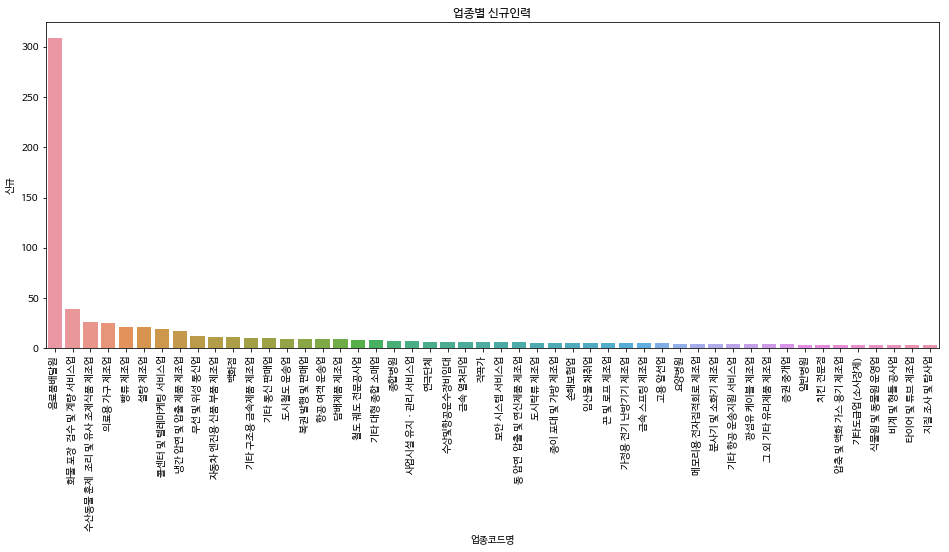

In [ ]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df_top100.index, y=df_top100)
plt.title('업종별 신규인력')
plt.xticks(rotation=90)
plt.show()

- 코로나 바이러스 이전 사태와는 면밀한 비교를 위하여 이전 데이터가 필요합니다.
- 하지만, 포스트 코로나 현상황에서는 **음료품배달업, 포장 검수 및 계량 서비스업, 수산동물 훈제 조리 및 유사 조제식품 제조업** 순으로 채용이 증가되었음을 확인할 수 있습니다.

In [ ]:
df_2 = df.groupby('업종코드명')['상실'].mean()

In [ ]:
df_bot100 = df_2.sort_values(ascending=False).head(50)

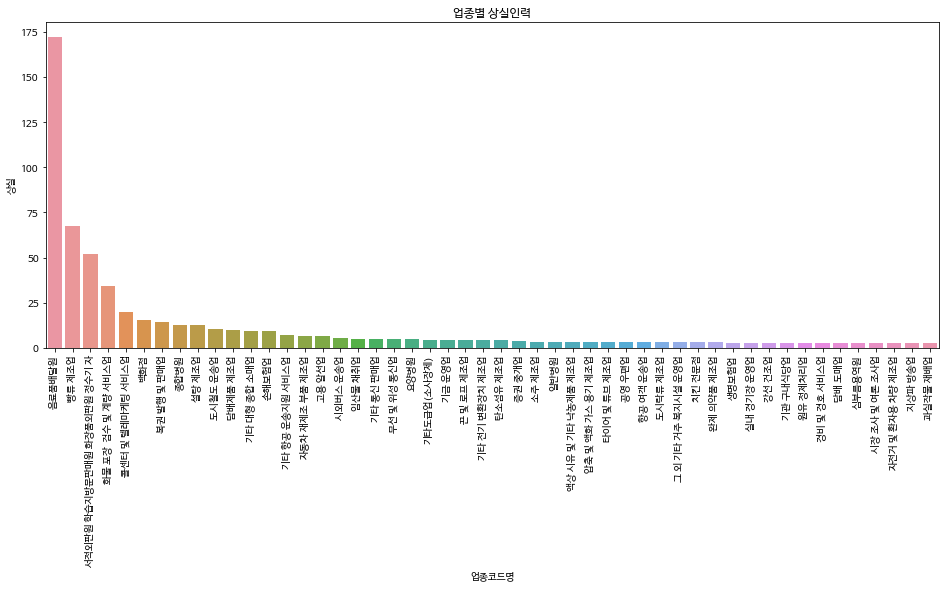

In [ ]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df_bot100.index, y=df_bot100)
plt.title('업종별 상실인력')
plt.xticks(rotation=90)
plt.show()

업종별 상실 인력에 대한 **TOP 50 결과**입니다.

여기서 재밌는 점은, 이전에 신규인력이 가장 많은 업종도 **음료품배달원** 이었다는 점입니다. 

좀 더 구체적인 데이터를 통해서 신규와 상실이 동시에 많이 일어난 이유에 대한 분석이 면밀히 필요합니다.

때론, 한 기업이 M&A를 진행된 후 타 회사로 인력이 **상실 -> 편입 되면서 데이터 인사이트에 대한 왜곡 현상**이 생길 수 있습니다.

## 업종별 단일 회사 연봉 비교 차트 그리기

In [ ]:
def compare_and_visualize(company):
    code = df[df['사업장명'] == company]['업종코드']
    cols = ['가입자수', '평균월급', '평균연봉', '신규', '상실', '업종코드']
    filtered = df.loc[df['업종코드']==code.item()][cols]
    df_company = df.loc[df['사업장명'] == company][cols]
    df_company = df_company.append(pd.Series(filtered.mean()), ignore_index=True)
    
    compare_cols = ['가입자수', '평균월급', '평균연봉', '신규', '상실']
    for col in compare_cols:
        plt.figure(figsize=(10, 5))
        sns.barplot(x=[company, '업종평균'], y=col, data=df_company)
        plt.title('{} vs 업종평균'.format(col), fontsize=18)
        plt.show()

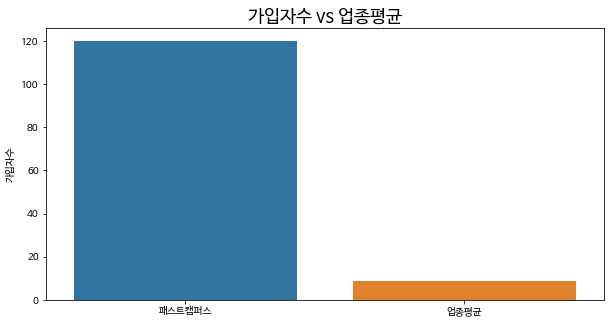

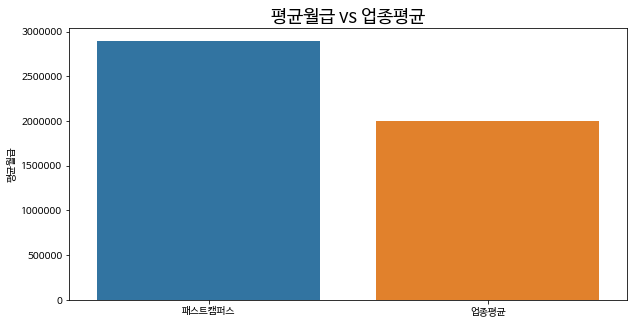

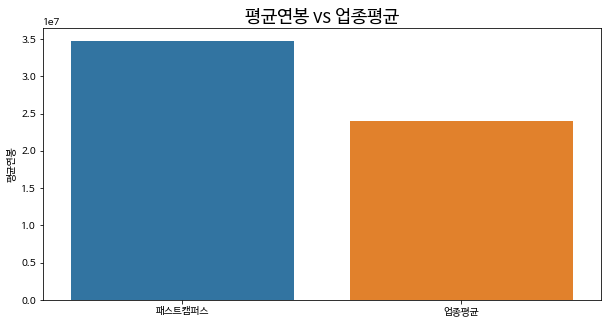

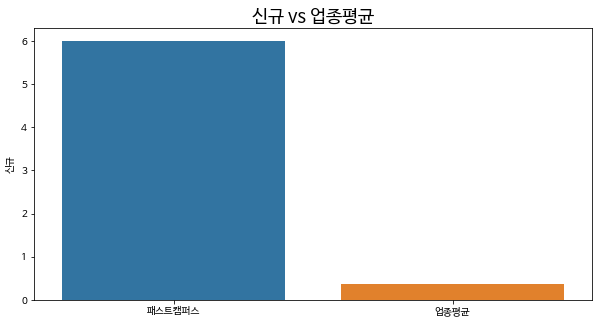

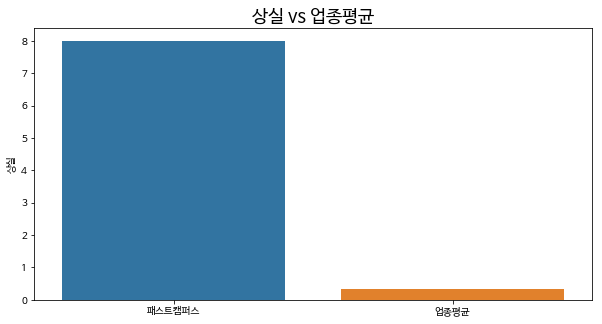

In [ ]:
compare_and_visualize('패스트캠퍼스')